# Relationships to Cooper
## By Curtis Leavitt

### How do the prices of stock market indices, gold, silver, natural gas, and crude oil influence copper prices and can we build a model to predict future copper prices based on these relationships?


# Collect Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Stock_Market_Dataset.csv")
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


# Preprocessing Data/ Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

### Reduce unneccesary columns

In [4]:
# Dropping Berkshire_Price due to error in numbers in column
columns_to_drop = ['Unnamed: 0', 'Berkshire_Price']
                   
df = df.drop(columns = columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   object 
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   object 
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   object 
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   object 
 14  Nasdaq_100_Price   1243 non-null   object 
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 

### Convert object datatypes to float

In [5]:
columns = ['Bitcoin_Price',
           'Platinum_Price',
           'Ethereum_Price',
           'S&P_500_Price',
           'Nasdaq_100_Price',
           'Gold_Price'
          ]
for column in columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column].str.replace(',','',regex=False))
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Natural_Gas_Vol.   1239 non-null   float64
 3   Crude_oil_Price    1243 non-null   float64
 4   Crude_oil_Vol.     1220 non-null   float64
 5   Copper_Price       1243 non-null   float64
 6   Copper_Vol.        1206 non-null   float64
 7   Bitcoin_Price      1243 non-null   float64
 8   Bitcoin_Vol.       1243 non-null   float64
 9   Platinum_Price     1243 non-null   float64
 10  Platinum_Vol.      636 non-null    float64
 11  Ethereum_Price     1243 non-null   float64
 12  Ethereum_Vol.      1243 non-null   float64
 13  S&P_500_Price      1243 non-null   float64
 14  Nasdaq_100_Price   1243 non-null   float64
 15  Nasdaq_100_Vol.    1242 non-null   float64
 16  Apple_Price        1243 

### Fill in NaN values with column mean value

In [6]:
columns_with_null = ['Natural_Gas_Vol.',
                     'Crude_oil_Vol.',
                     'Copper_Vol.',
                     'Platinum_Vol.',
                     'Nasdaq_100_Vol.',
                     'Silver_Vol.',
                     'Gold_Vol.'
                    ]
for column in columns_with_null:
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame!")
    else:
        df[column] = df[column].fillna(df[column].mean())

In [7]:
df.describe()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Nvidia_Vol.,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
count,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000,1243.000000,...,1.243000e+03,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1243.000000
mean,3.494714,131624.116223,67.577064,3.989038e+05,3.541957,35406.616915,25241.903057,4.033918e+07,959.003620,9082.515723,...,4.560298e+07,2426.524537,404.839541,7.057401e+06,128.683234,7.413005e+07,239.728134,2.325851e+07,1759.246742,211127.671233
std,1.822540,64281.378359,20.465500,2.141510e+05,0.702819,37838.911621,16029.009055,2.940889e+08,108.012849,6347.017709,...,1.869107e+07,2660.497572,114.989473,6.384187e+06,30.808631,3.245753e+07,71.015427,1.555486e+07,203.258901,114913.716277
min,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,3397.700000,2.600000e+02,595.200000,0.000000,...,9.790000e+06,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06,1272.000000,0.000000
25%,2.347500,92160.000000,55.095000,2.857900e+05,2.858750,385.000000,10014.600000,7.907500e+04,889.775000,5545.000000,...,3.245000e+07,345.000000,323.010000,3.990000e+06,96.260000,5.264500e+07,183.355000,1.478500e+07,1669.600000,152215.000000
50%,2.702000,127670.000000,69.230000,3.683000e+05,3.666000,24880.000000,23055.100000,2.153100e+05,944.700000,9082.515723,...,4.279000e+07,1510.000000,384.150000,5.610000e+06,128.730000,6.520000e+07,224.430000,1.934000e+07,1804.200000,197980.000000
75%,4.055500,169340.000000,80.455000,5.012600e+05,4.137250,67195.000000,37784.200000,6.151050e+05,1020.400000,9082.515723,...,5.511500e+07,3225.000000,495.365000,7.910000e+06,158.110000,8.674500e+07,301.650000,2.711500e+07,1912.800000,257850.000000
max,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,67527.900000,4.470000e+09,1297.100000,42830.000000,...,1.534600e+08,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,2089.700000,813410.000000


### Replace zeros and negative numbers of certain columns with the mean

In [8]:
def replace_numbers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        mean_value = df.loc[(df[col] > 0), col].mean()
        df[col] = df[col].where(df[col] > 0, mean_value)
    return(df)

df_ = replace_numbers(df)
df.describe()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Nvidia_Vol.,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
count,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000,1243.000000,...,1.243000e+03,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1243.00000
mean,3.494714,131624.116223,67.661771,3.989038e+05,3.541957,35406.616915,25241.903057,4.033918e+07,959.003620,9133.953919,...,4.560298e+07,2426.524537,404.839541,7.057401e+06,128.683234,7.413005e+07,239.728134,2.325851e+07,1759.246742,211809.27792
std,1.822540,64281.378359,20.246423,2.141510e+05,0.702819,37838.911621,16029.009055,2.940889e+08,108.012849,6310.076815,...,1.869107e+07,2660.497572,114.989473,6.384187e+06,30.808631,3.245753e+07,71.015427,1.555486e+07,203.258901,114285.34591
min,1.482000,1200.000000,10.010000,1.702000e+04,2.100500,10.000000,3397.700000,2.600000e+02,595.200000,10.000000,...,9.790000e+06,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06,1272.000000,10.00000
25%,2.347500,92160.000000,55.135000,2.857900e+05,2.858750,385.000000,10014.600000,7.907500e+04,889.775000,6070.000000,...,3.245000e+07,345.000000,323.010000,3.990000e+06,96.260000,5.264500e+07,183.355000,1.478500e+07,1669.600000,152670.00000
50%,2.702000,127670.000000,69.230000,3.683000e+05,3.666000,24880.000000,23055.100000,2.153100e+05,944.700000,9082.515723,...,4.279000e+07,1510.000000,384.150000,5.610000e+06,128.730000,6.520000e+07,224.430000,1.934000e+07,1804.200000,198140.00000
75%,4.055500,169340.000000,80.455000,5.012600e+05,4.137250,67195.000000,37784.200000,6.151050e+05,1020.400000,9082.515723,...,5.511500e+07,3225.000000,495.365000,7.910000e+06,158.110000,8.674500e+07,301.650000,2.711500e+07,1912.800000,257850.00000
max,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,67527.900000,4.470000e+09,1297.100000,42830.000000,...,1.534600e+08,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,2089.700000,813410.00000


### Convert Date column to datetime object

In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
print(df['Date'].dtype)

datetime64[ns]


### Add days of the week using Date column

In [10]:
df['DayofWeek'] = df['Date'].dt.day_name()
columns = ['Monday','Tuesday','Wednesday','Thursday','Friday']
for day in columns:
    df[day] = (df['DayofWeek'] == day).astype(int)
df =df.drop(columns = ['DayofWeek','Date'])
df.head()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,Monday,Tuesday,Wednesday,Thursday,Friday
0,2.079,131624.116223,72.28,398903.778689,3.8215,35406.616915,43194.7,42650.0,901.6,9082.515723,...,117220000.0,474.99,84710000.0,2053.7,211127.671233,0,0,0,0,1
1,2.050,161340.000000,73.82,577940.000000,3.8535,35406.616915,43081.4,47690.0,922.3,9082.515723,...,66360000.0,394.78,25140000.0,2071.1,260920.000000,0,0,0,1,0
2,2.100,142860.000000,75.85,344490.000000,3.9060,35406.616915,42580.5,56480.0,932.6,9082.515723,...,49690000.0,390.14,20010000.0,2067.4,238370.000000,0,0,1,0,0
3,2.077,139750.000000,77.82,347240.000000,3.9110,35406.616915,42946.2,55130.0,931.7,9082.515723,...,42290000.0,400.06,18610000.0,2050.9,214590.000000,0,1,0,0,0
4,2.490,3590.000000,76.78,331930.000000,3.8790,35406.616915,43299.8,45230.0,938.3,9082.515723,...,42840000.0,401.02,17790000.0,2034.9,1780.000000,1,0,0,0,0


# Statistical Tests

### Run Kendall Tau correlation
* Tau is the statiscal measure used to assess the strength and direction of the association between two variables.

In [11]:
from scipy.stats import kendalltau
import numpy as np

In [12]:
x = df.drop(columns='Copper_Price')
y = df['Copper_Price']

In [13]:
results = []

for col in df.columns:
    if col != 'Copper_Price':
        x = df[col]
        valid_data = pd.DataFrame({'x': x, 'y': y}).dropna()
        if not valid_data.empty:
            tau, p_value = kendalltau(valid_data['x'], valid_data['y'])
            
            if np.isfinite(tau) and np.isfinite(p_value):  # Ensure no infinities
                results.append({'Variable': col, 'Tau': tau, 'P-value': p_value})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Tau', ascending=False)

results_df['P-value'] = results_df['P-value'].apply(lambda x: '{:.4f}'.format(x))  # Format to 8 decimal places

print(results_df)

             Variable       Tau P-value
9      Ethereum_Price  0.711307  0.0000
5       Bitcoin_Price  0.655759  0.0000
11      S&P_500_Price  0.641250  0.0000
22       Google_Price  0.616076  0.0000
12   Nasdaq_100_Price  0.566134  0.0000
16        Tesla_Price  0.546728  0.0000
18    Microsoft_Price  0.516811  0.0000
24       Nvidia_Price  0.506958  0.0000
7      Platinum_Price  0.503627  0.0000
20       Silver_Price  0.487475  0.0000
14        Apple_Price  0.464953  0.0000
2     Crude_oil_Price  0.459112  0.0000
0   Natural_Gas_Price  0.452419  0.0000
29       Amazon_Price  0.399520  0.0000
26     Berkshire_Vol.  0.336146  0.0000
33         Gold_Price  0.335636  0.0000
31         Meta_Price  0.320690  0.0000
27      Netflix_Price  0.224629  0.0000
13    Nasdaq_100_Vol.  0.138798  0.0000
32          Meta_Vol.  0.130833  0.0000
4         Copper_Vol.  0.048378  0.0108
37          Wednesday  0.006106  0.7922
38           Thursday  0.004209  0.8559
39             Friday  0.003032  0.8959


# Hypothesis Results
### Evaluated Criteria
* Tau Coeffecient >= 0.7
* P-value < 0.05

In [14]:
tau_threshold = 0.69
p_value_threshold = 0.05

for col in df.columns:
    if col != 'Copper_Price':
        x = df[col]
        
        # Calculate Kendall's Tau and p-value
        tau, p_value = kendalltau(x, y)
        
        # Check if the Tau and p-value match the criteria
        if tau > tau_threshold and p_value < p_value_threshold:
            print(f"Variable '{col}' meets the criteria: Tau = {tau:.3f}, p-value = {p_value:.4f}")
            print(f"This supports our hypothesis and rejects the null hypothesis.")

Variable 'Ethereum_Price' meets the criteria: Tau = 0.711, p-value = 0.0000
This supports our hypothesis and rejects the null hypothesis.


### Plot Heatmap showing Correlation

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

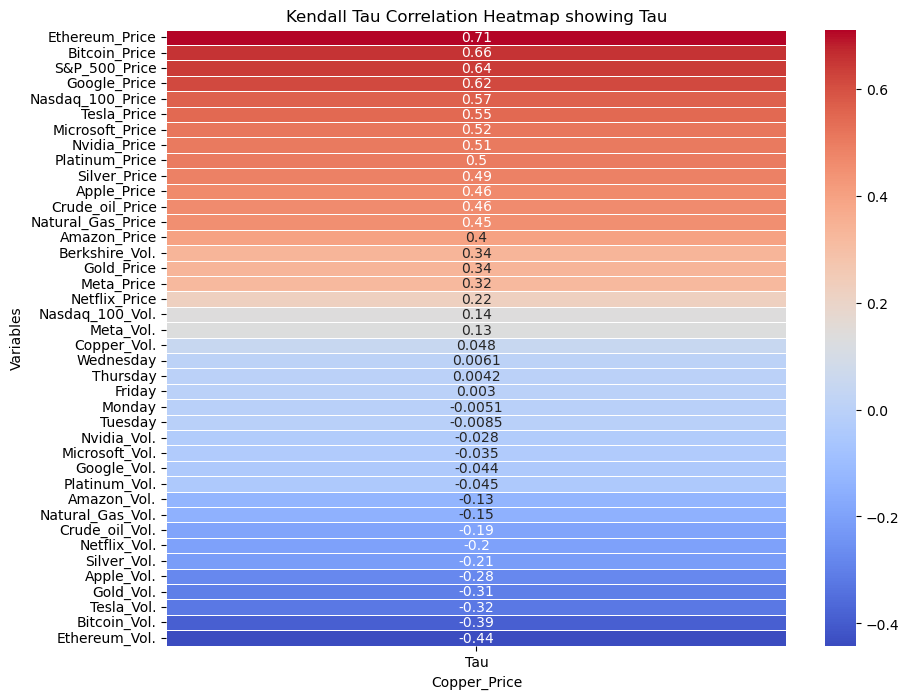

In [16]:
heatmap_data = results_df[['Variable', 'Tau']].set_index('Variable')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Kendall Tau Correlation Heatmap showing Tau')
plt.xlabel('Copper_Price')
plt.ylabel('Variables')
plt.show()

### Heatmap indicating correlation between all variables
* Deliverable 1.1.1
  * Visualize variables with high correlation(>0.85)

In [17]:
import numpy as np

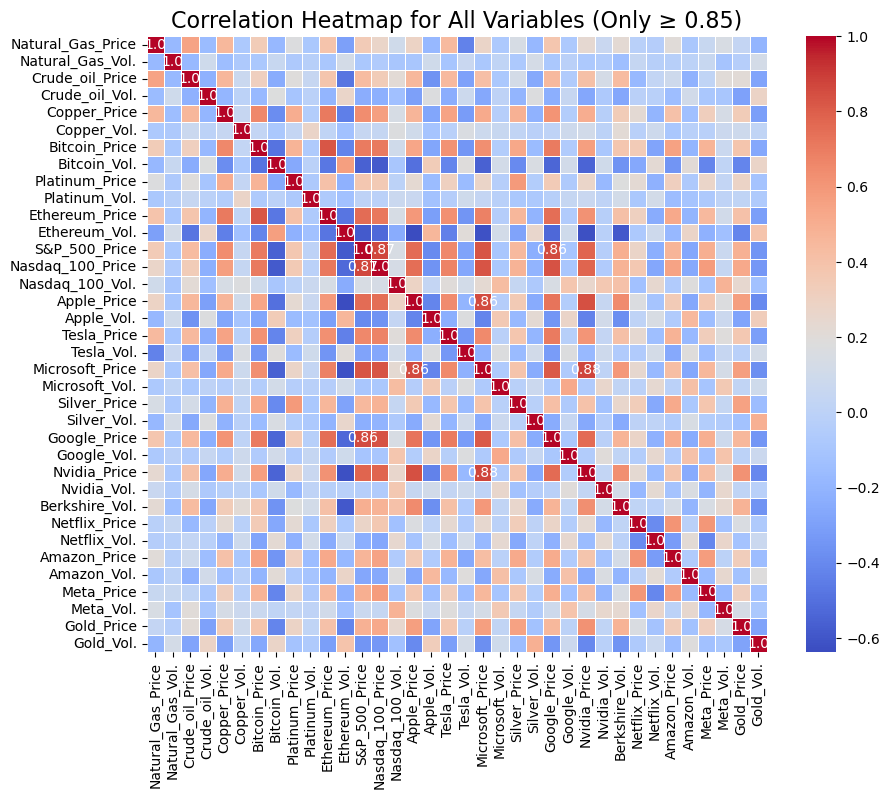

In [18]:
columns_to_drop = ['Monday','Tuesday','Wednesday','Thursday','Friday']
temp_df = df.drop(columns=columns_to_drop)

corr_matrix = temp_df.corr(method='kendall')  # You can use 'pearson', 'spearman', or 'kendall'
annot_matrix = np.where(corr_matrix >= 0.85, corr_matrix.round(2).astype(str), '')  # Annotate only for correlations >= 0.85

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=annot_matrix, cmap='coolwarm', fmt='', linewidths=0.5)

plt.title('Correlation Heatmap for All Variables (Only ≥ 0.85)', fontsize=16)

plt.show()

There are no variables that have a high correlation(>0.85) with Copper_Price.

# Model Creation

In [19]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [20]:
X = df.drop(columns='Copper_Price')
y = df['Copper_Price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Visualize Representation of Train vs Test Data

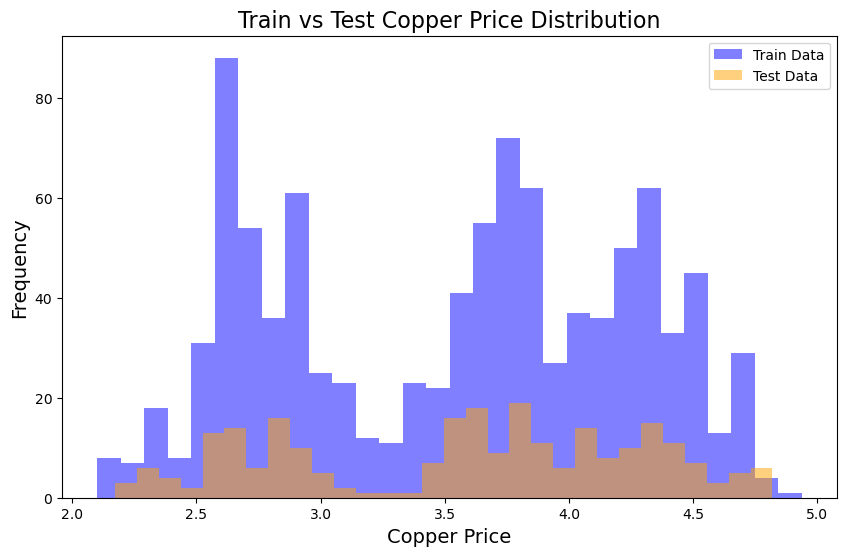

In [22]:
plt.figure(figsize=(10,6))
plt.hist(y_train, bins=30, alpha=0.5, label='Train Data', color='blue')
plt.hist(y_test, bins=30, alpha=0.5, label='Test Data', color='orange')
plt.title('Train vs Test Copper Price Distribution', fontsize=16)
plt.xlabel('Copper Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

### Train Model
* Basic model with no parameters

In [23]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Prediction

In [24]:
y_pred = xg_reg.predict(X_test)

### Evaluate Model

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
eval_results_df = pd.DataFrame(columns=['Model', 'MSE', 'R2'])
def save_results(model, mse, r2, df):
    # Create a dictiontary with the resulting scores and add to Dataframe
    eval_results = {
        'Model': model,
        'MSE': mse,
        'R2': r2
    }
    df = pd.concat([df, pd.DataFrame([eval_results])], ignore_index=True)
    return df
eval_results_df = save_results('XGBoost_no_tune', mse, r2, eval_results_df)
print(eval_results_df)

             Model      MSE       R2
0  XGBoost_no_tune  0.00555  0.98857


### Visualize Prediction

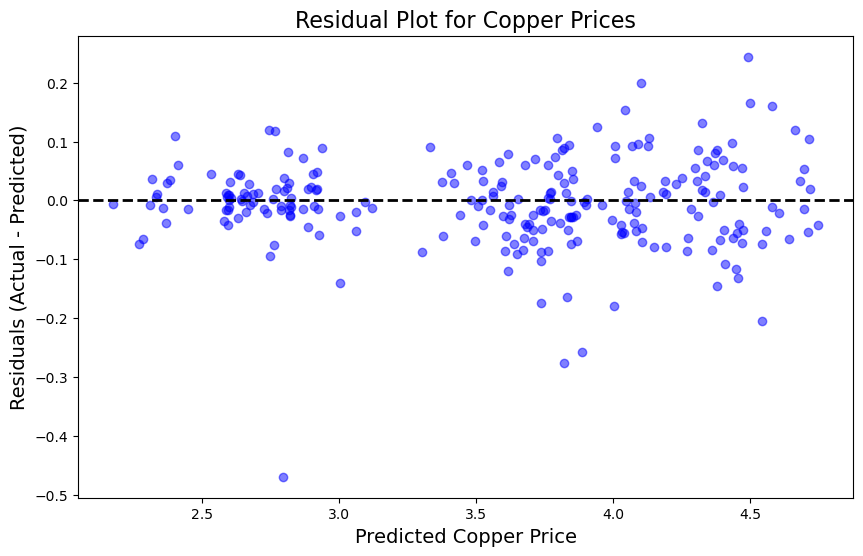

In [28]:
# Residual plot: Difference between actual and predicted values
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.title('Residual Plot for Copper Prices', fontsize=16)
plt.xlabel('Predicted Copper Price', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)
plt.show()

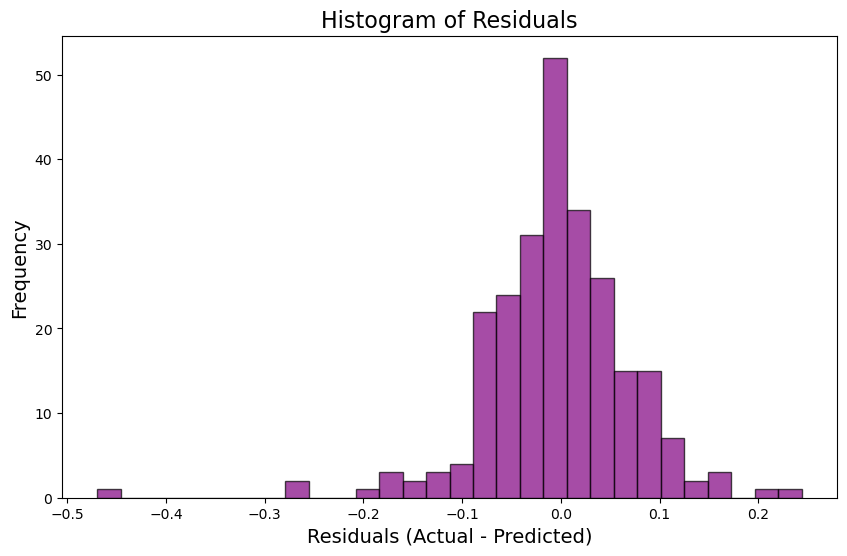

In [29]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### Hyperparameter Tuning
* Using GridSearch to find the best model parameters

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.03, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'alpha': [0, 1],
    'lambda': [0,1]
}
grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3, 
    verbose=1,
    n_jobs=-1
    )

### Trian Model

In [32]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 1], 'colsample_bytree': [0.8, 1.0],
                         'lambda': [0, 1], 'learning_rate': [0.03, 0.1],
                         'max_depth': [3, 5], 'min_child_weight': [1, 3],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

#### Get Best Model

In [33]:
best_model = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')

Best parameters found: {'alpha': 0, 'colsample_bytree': 0.8, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


### Prediction

In [34]:
y_pred = best_model.predict(X_test)

### Evaluate Model
* Deliverable 1.2.1
  * r2 score >= 0.90
* Deliverable 1.2.2
  * Mean Squared Error <= 0.01

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
eval_results_df = save_results('XGBoost_tuned', mse, r2, eval_results_df)
print(eval_results_df)

             Model       MSE        R2
0  XGBoost_no_tune  0.005550  0.988570
1    XGBoost_tuned  0.005025  0.989651


Both the standard and hyperparameter tuned models of XGBoost met both the criteria.

# Testing Model

In [37]:
# load dataset
test_df = pd.read_csv("test_dataset.csv")

In [38]:
#Convert datatypes to float64
columns = test_df.columns
for column in columns:
    if test_df[column].dtype == 'object':
        test_df[column] = pd.to_numeric(test_df[column].str.replace(',','',regex=False))
        
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  4 non-null      float64
 1   Natural_Gas_Vol.   4 non-null      int64  
 2   Crude_oil_Price    4 non-null      int64  
 3   Crude_oil_Vol.     4 non-null      int64  
 4   Copper_Vol.        4 non-null      int64  
 5   Bitcoin_Price      4 non-null      int64  
 6   Bitcoin_Vol.       4 non-null      int64  
 7   Platinum_Price     4 non-null      int64  
 8   Platinum_Vol.      4 non-null      int64  
 9   Ethereum_Price     4 non-null      float64
 10  Ethereum_Vol.      4 non-null      int64  
 11  S&P_500_Price      4 non-null      float64
 12  Nasdaq_100_Price   4 non-null      float64
 13  Nasdaq_100_Vol.    4 non-null      int64  
 14  Apple_Price        4 non-null      float64
 15  Apple_Vol.         4 non-null      int64  
 16  Tesla_Price        4 non-null 

In [39]:
y_pred = best_model.predict(test_df)

# Results

In [40]:
dates = ['2024-09-23','2024-09-24','2024-09-25','2024-09-26']
results = pd.DataFrame({
    'Date': dates,
    'Predicted Value': y_pred
})
print(results.to_string(index=False))

      Date  Predicted Value
2024-09-23         3.917827
2024-09-24         3.968121
2024-09-25         3.948011
2024-09-26         3.878597


# Reducing Features 
* To make prediction more realistic for real use cases

In [41]:
ftr_imp = pd.DataFrame(data=xg_reg.feature_importances_,
                       index=xg_reg.feature_names_in_,
                       columns=['Feature_Importance'])

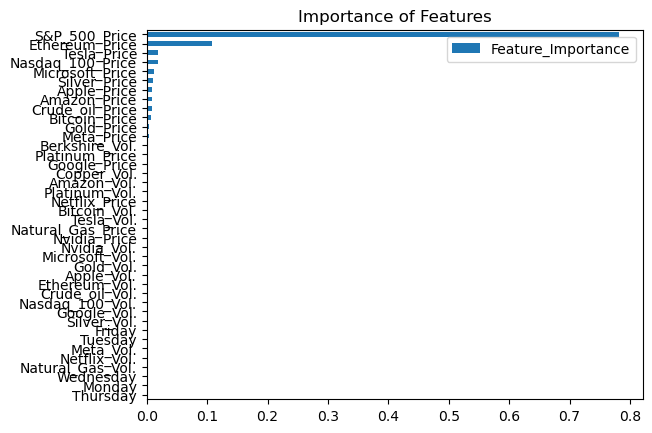

In [42]:
ftr_imp.sort_values('Feature_Importance').plot(kind='barh', title='Importance of Features')
plt.show()

In [43]:
selected_columns = ['Copper_Price',
                    'S&P_500_Price',
                    'Ethereum_Price',
                    'Tesla_Price',
                    'Nasdaq_100_Price',
                    'Microsoft_Price',
                    'Silver_Price'
                   ]
updated_df = df[selected_columns]

### Split Dataset to Train & Test

In [44]:
X = updated_df.drop('Copper_Price', axis=1)
y = updated_df['Copper_Price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Model

In [46]:
xg_reg = xgb.XGBRegressor()

### Use GridSearch to find best parameters

In [47]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 1], 'colsample_bytree': [0.8, 1.0],
                         'lambda': [0, 1], 'learning_rate': [0.03, 0.1],
                         'max_depth': [3, 5], 'min_child_weight': [1, 3],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

### Prediction

In [48]:
best_model = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')

Best parameters found: {'alpha': 0, 'colsample_bytree': 0.8, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


In [49]:
y_pred = best_model.predict(X_test)

### Evaluate Prediction

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
eval_results_df = save_results('XGBoost_6var', mse, r2, eval_results_df)
print(eval_results_df)

             Model       MSE        R2
0  XGBoost_no_tune  0.005550  0.988570
1    XGBoost_tuned  0.005025  0.989651
2     XGBoost_6var  0.006700  0.986200


### Visualize Model

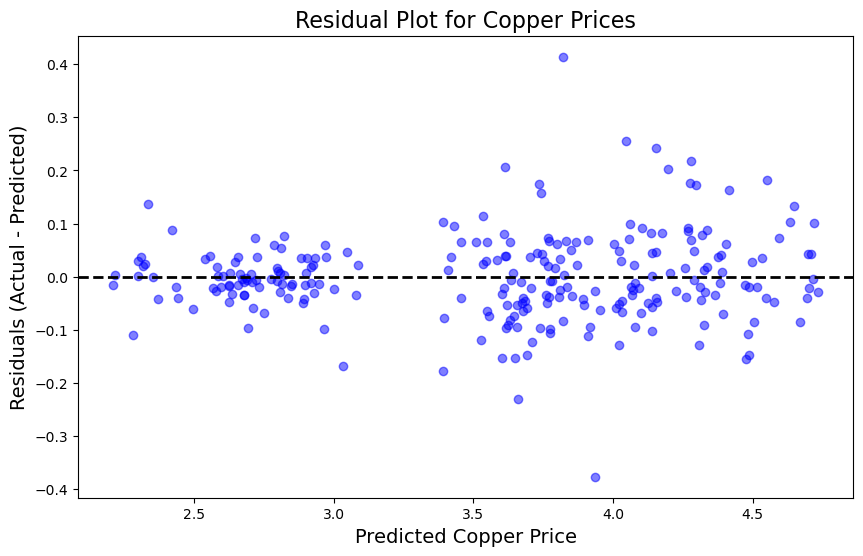

In [52]:
# Residual plot: Difference between actual and predicted values
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.title('Residual Plot for Copper Prices', fontsize=16)
plt.xlabel('Predicted Copper Price', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)
plt.show()

# Test New Model with 6 Variables

In [53]:
new_test_df = pd.read_csv('test_dataset.csv')

In [54]:
#Reduce amount of columns
new_columns = ['S&P_500_Price',
                'Ethereum_Price',
                'Tesla_Price',
                'Nasdaq_100_Price',
                'Microsoft_Price',
                'Silver_Price'
              ]
new_test_df = new_test_df[new_columns]

#Convert datatypes to float64
columns = new_test_df.columns
for column in columns:
    if new_test_df[column].dtype == 'object':
        new_test_df[column] = pd.to_numeric(new_test_df[column].str.replace(',','',regex=False))
        
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P_500_Price     4 non-null      float64
 1   Ethereum_Price    4 non-null      float64
 2   Tesla_Price       4 non-null      float64
 3   Nasdaq_100_Price  4 non-null      float64
 4   Microsoft_Price   4 non-null      float64
 5   Silver_Price      4 non-null      float64
dtypes: float64(6)
memory usage: 320.0 bytes


In [55]:
new_pred = best_model.predict(new_test_df)
new_pred

array([3.8002942, 3.7972906, 3.9183025, 3.842244 ], dtype=float32)

### New Prediction with 6 Variables vs Old Model with 40 Variables

In [56]:
results['var6_prediction'] = new_pred

In [57]:
print(results)

         Date  Predicted Value  var6_prediction
0  2024-09-23         3.917827         3.800294
1  2024-09-24         3.968121         3.797291
2  2024-09-25         3.948011         3.918303
3  2024-09-26         3.878597         3.842244


### Save Model

In [58]:
import joblib

In [60]:
joblib.dump(best_model, 'xgbRegressor.pkl')

['xgbRegressor.pkl']

### Load Model

In [61]:
model = joblib.load('xgbRegressor.pkl')